In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
column_names = ['year', 'labor_male', 'labor_female', 'unemp_male', 'unemp_female', 'av_earnings_1982', 'av_earnings_current']

In [6]:
raw_data = """1980 77.4 51.5 6.9 7.4 7.78 6.66
1981 77.0 52.1 7.4 7.9 7.69 7.25
1982 76.6 52.6 9.9 9.4 7.68 7.68
1983 76.4 53.9 9.9 9.2 7.79 8.02
1984 76.4 53.6 7.4 7.6 7.80 8.32
1985 76.3 54.5 7.0 7.4 7.77 8.57
1986 76.3 55.3 6.9 7.1 7.81 8.76
1987 76.2 56.0 6.2 6.2 7.73 8.98
1988 76.2 56.6 5.5 5.6 7.69 9.28
1989 76.4 57.4 5.2 5.4 7.64 9.66
1990 76.4 57.5 5.7 5.5 7.52 10.01
1991 75.8 57.4 7.2 6.4 7.45 10.32
1992 75.8 57.8 7.9 7.0 7.41 10.57
1993 75.4 57.9 7.2 6.6 7.39 10.83
1994 75.1 58.8 6.2 6.0 7.40 11.12
1995 75.0 58.9 5.6 5.6 7.40 11.44
1996 74.9 59.3 5.4 5.4 7.43 11.82"""

In [12]:
raw_data_split = raw_data.split()

In [62]:
def raw_to_df(raw_data_split, column_names):
    df = pd.DataFrame()
    for i in range(len(column_names)):
        df[column_names[i]] = [float(raw_data_split[j]) for j in range(i,len(raw_data_split), len(column_names))]
    return df

In [63]:
labor_df = raw_to_df(raw_data_split, column_names)

In [65]:
labor_df.year = labor_df.year.astype('int')

In [66]:
labor_df

,year,labor_male,labor_female,unemp_male,unemp_female,av_earnings_1982,av_earnings_current
0,1980,77.4,51.5,6.9,7.4,7.78,6.66
1,1981,77.0,52.1,7.4,7.9,7.69,7.25
2,1982,76.6,52.6,9.9,9.4,7.68,7.68
3,1983,76.4,53.9,9.9,9.2,7.79,8.02
4,1984,76.4,53.6,7.4,7.6,7.80,8.32
5,1985,76.3,54.5,7.0,7.4,7.77,8.57
6,1986,76.3,55.3,6.9,7.1,7.81,8.76
7,1987,76.2,56.0,6.2,6.2,7.73,8.98
8,1988,76.2,56.6,5.5,5.6,7.69,9.28
9,1989,76.4,57.4,5.2,5.4,7.64,9.66


In [99]:
x_male = labor_df.unemp_male.values
x_male = x_male.reshape(-1,1)
y_male = labor_df.labor_male.values

In [100]:
model = LinearRegression()

In [101]:
fitted_model = model.fit(x_male, y_male)

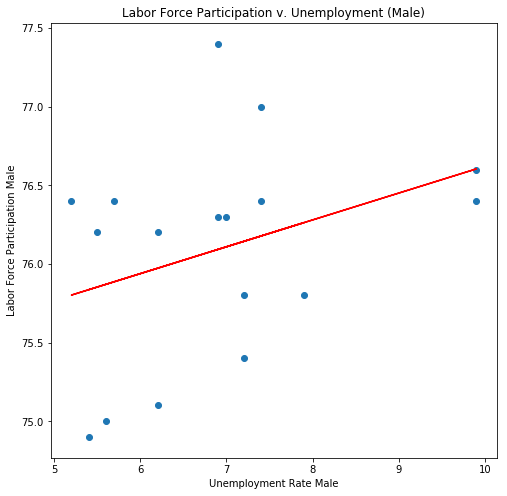

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(labor_df.unemp_male, labor_df.labor_male)
ax.set_title("Labor Force Participation v. Unemployment (Male)")
ax.set_ylabel("Labor Force Participation Male")
ax.set_xlabel("Unemployment Rate Male")
ax.plot(x_male, fitted_model.predict(x_male), color='r')

In [103]:
x_female = labor_df.unemp_female.values
x_female = x_female.reshape(-1,1)
y_female = labor_df.labor_female.values

In [104]:
fitted_model_female = model.fit(x_female, y_female)

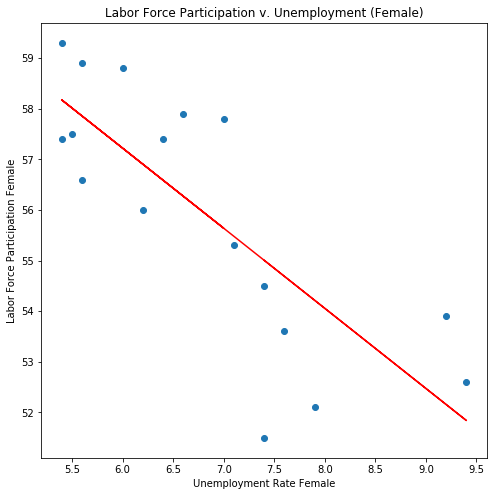

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(labor_df.unemp_female, labor_df.labor_female)
ax.set_title("Labor Force Participation v. Unemployment (Female)")
ax.set_ylabel("Labor Force Participation Female")
ax.set_xlabel("Unemployment Rate Female")
ax.plot(x_female, fitted_model.predict(x_female), color='r')

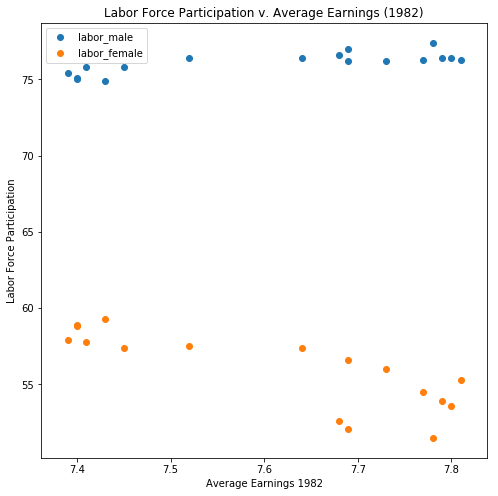

In [109]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(labor_df.av_earnings_1982, labor_df.labor_male)
ax.scatter(labor_df.av_earnings_1982, labor_df.labor_female)
ax.set_title("Labor Force Participation v. Average Earnings (1982)")
ax.set_ylabel("Labor Force Participation")
ax.set_xlabel("Average Earnings 1982")
ax.legend()

In [177]:
male_model = LinearRegression()

In [178]:
fitted_model_m = male_model.fit(labor_df.av_earnings_1982.values.reshape(-1,1), y_m)

In [183]:
fitted_model_m.coef_

array([3.26436751])

In [184]:
female_model = LinearRegression()

In [185]:
fitted_model_f = female_model.fit(labor_df.av_earnings_1982.values.reshape(-1,1), y_f)

In [186]:
fitted_model_f.coef_

array([-12.23283006])

Text(0.5, 1.0, 'Labor Force Participation Female v. Average Earnings 1982')

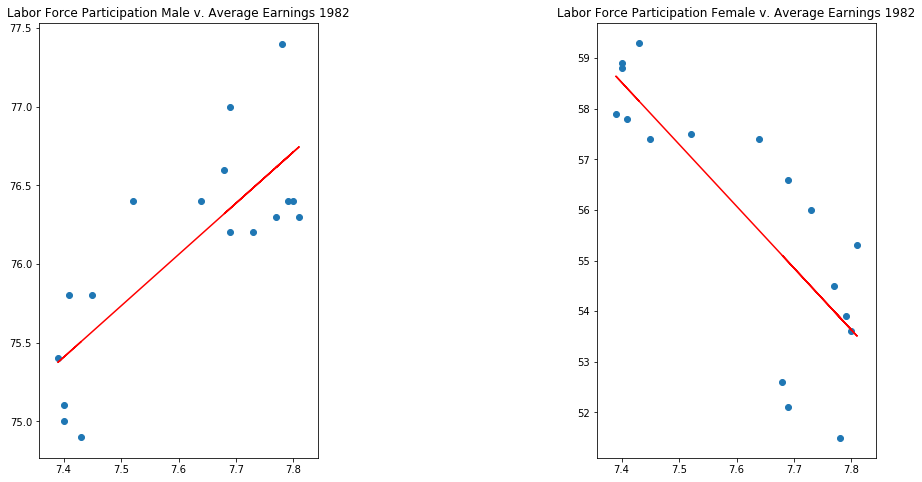

In [194]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
plt.subplots_adjust(wspace=1)
ax[0].scatter(labor_df.av_earnings_1982, labor_df.labor_male)
ax[0].plot(labor_df.av_earnings_1982.values.reshape(-1,1), 
           fitted_model_m.predict(labor_df.av_earnings_1982.values.reshape(-1,1)), 
           color='r')
ax[0].set_title("Labor Force Participation Male v. Average Earnings 1982")
ax[1].scatter(labor_df.av_earnings_1982, labor_df.labor_female)
ax[1].plot(labor_df.av_earnings_1982.values.reshape(-1,1), 
           fitted_model_f.predict(labor_df.av_earnings_1982.values.reshape(-1,1)), 
           color='r')
ax[1].set_title("Labor Force Participation Female v. Average Earnings 1982")
